# Regression Practice

Predicting the selling price of a residential property depends on a number of factors, including the property age, availability of local amenities, and location.

In this practice, I will use a dataset of real estate sales transactions to predict the price-per-unit of a property based on its features. The price-per-unit in this data is based on a unit measurement of 3.3 square meters.

> **Citation**: The data used in this exercise originates from the following study:
>
> *Yeh, I. C., & Hsu, T. K. (2018). Building real estate valuation models with comparative approach through case-based reasoning. Applied Soft Computing, 65, 260-271.*
>
> It was obtained from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository]([http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science).

## Review the data

In [1]:
import pandas as pd

# load the training dataset
data = pd.read_csv('real_estate.csv')
data.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


The data consists of the following variables:

- **transaction_date** - the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
- **house_age** - the house age (in years)
- **transit_distance** - the distance to the nearest light rail station (in meters)
- **local_convenience_stores** - the number of convenience stores within walking distance
- **latitude** - the geographic coordinate, latitude
- **longitude** - the geographic coordinate, longitude
- **price_per_unit** house price of unit area (3.3 square meters)

## Train a Regression Model

The goal is to explore and prepare the data, identify predictive features that will help predict the **price_per_unit** label, and train a regression model that achieves the lowest Root Mean Square Error (RMSE) I can achieve (which must be less than **7**) when evaluated against a test subset of data.

In [2]:
# Load packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Explore the data

In [3]:
# Convert 'transaction_date' to 'year' and 'month'
data['year'] = data['transaction_date'].apply(np.floor).astype(int)
data['month'] = ((data['transaction_date'] - data['year']) * 12).apply(round).astype(int)
data.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit,year,month
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,2012,11
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,2012,11
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,2013,7
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,2013,6
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,2012,10


In [4]:
data.describe()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit,year,month
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193,2012.695652,5.439614
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488,0.460687,3.381330
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000,2012.000000,0.000000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000,2012.000000,3.000000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000,2013.000000,5.000000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000,2013.000000,8.000000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000,2013.000000,11.000000


### View the label distribution

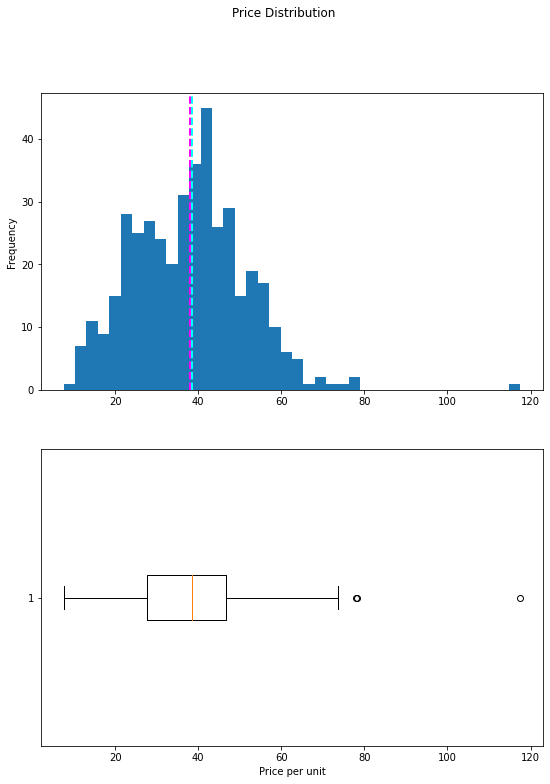

In [5]:
# Plot the label data
def plot_label(data):
    # Get the label column
    label = data['price_per_unit']
    
    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (9,12))

    # Plot the histogram   
    ax[0].hist(label, bins=40)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)

    # Plot the boxplot   
    ax[1].boxplot(label, vert=False)
    ax[1].set_xlabel('Price per unit')

    # Add a title to the Figure
    fig.suptitle('Price Distribution')

    # Show the figure
    fig.show()
plot_label(data)

### Remove outlier

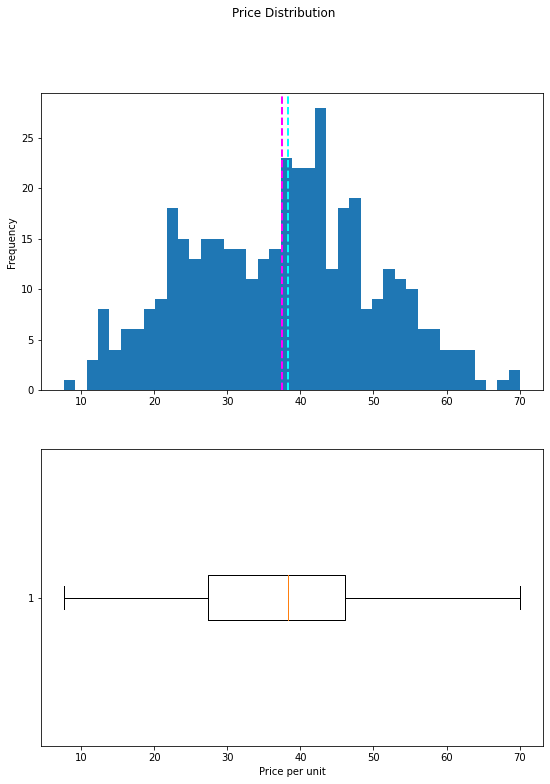

In [6]:
data = data[data.price_per_unit < data.price_per_unit.quantile(0.99)]
plot_label(data)

### View numeric correlations and categorical features

In [7]:
# Get the label and features
label = data['price_per_unit']
label.head()
features = data.drop(columns = ['price_per_unit', 'year', 'month'])
features.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude
0,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2012.917,19.5,306.59470,9,24.98034,121.53951
2,2013.583,13.3,561.98450,5,24.98746,121.54391
3,2013.500,13.3,561.98450,5,24.98746,121.54391
4,2012.833,5.0,390.56840,5,24.97937,121.54245


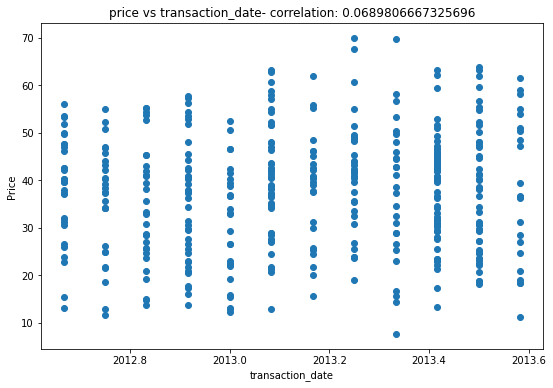

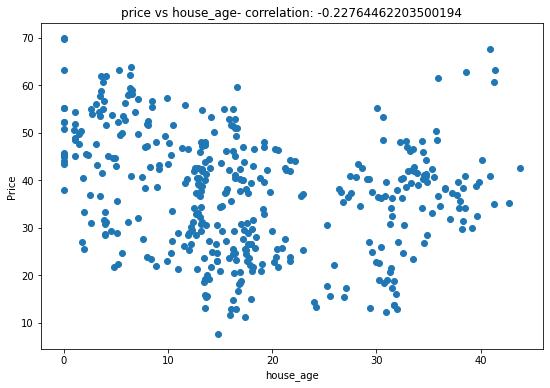

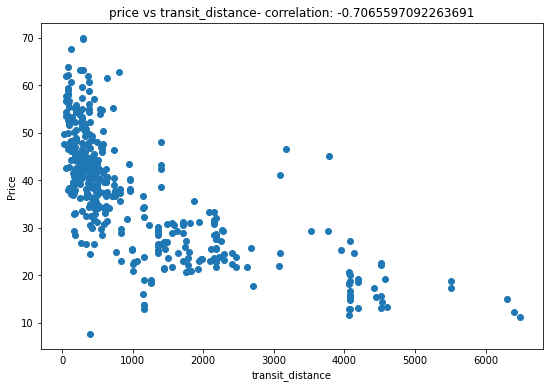

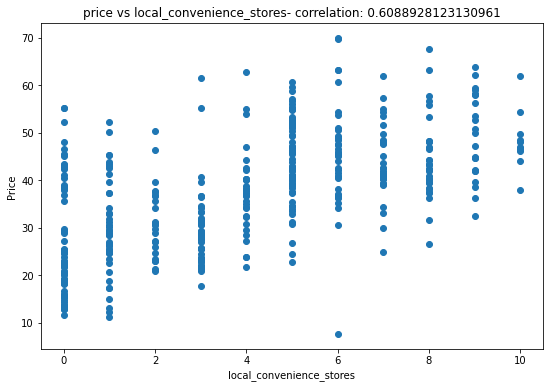

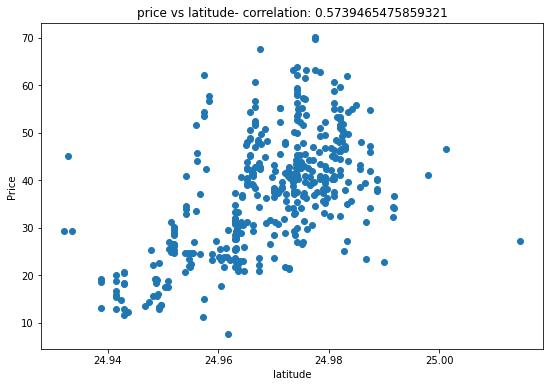

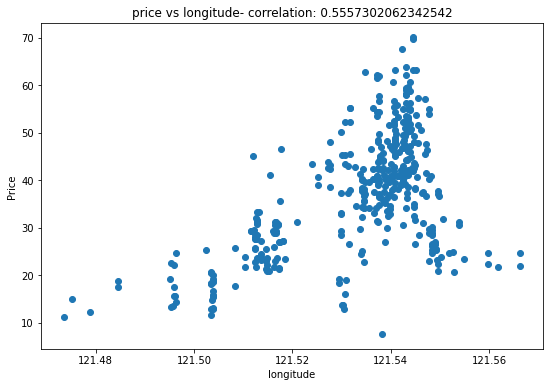

In [8]:
for col in features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = data[col]
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Price')
    ax.set_title('price vs ' + col + '- correlation: ' + str(correlation))
plt.show()


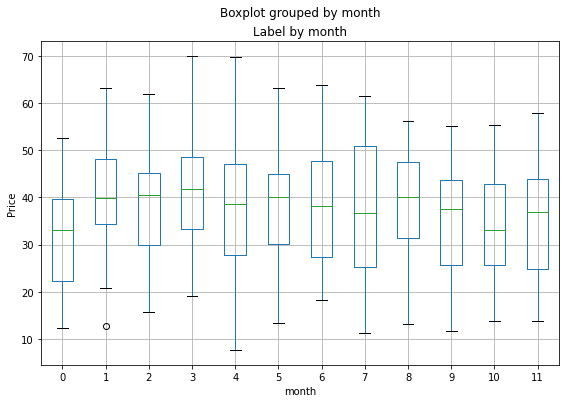

In [9]:
# 'transaction_date' doesn't seem like a strong correlated feature
# The data contains a year of data, so check if 'month' is predictive as a categorical feature
# Plot a boxplot for the label by each categorical feature
categorical_features = ['month']
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    data.boxplot(column = 'price_per_unit', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Price")
plt.show()

### Separate features and label

In [10]:
# Omit 'transaction_date', 'year', 'month' since they are not predictive
# All features work as numeric
X, y = data[['transit_distance','local_convenience_stores','latitude','longitude','house_age']].values, data['price_per_unit'].values
print('Features:',X[:10], '\n Labels:', y[:10], sep='\n')

Features:
[[8.4878820e+01 1.0000000e+01 2.4982980e+01 1.2154024e+02 3.2000000e+01]
 [3.0659470e+02 9.0000000e+00 2.4980340e+01 1.2153951e+02 1.9500000e+01]
 [5.6198450e+02 5.0000000e+00 2.4987460e+01 1.2154391e+02 1.3300000e+01]
 [5.6198450e+02 5.0000000e+00 2.4987460e+01 1.2154391e+02 1.3300000e+01]
 [3.9056840e+02 5.0000000e+00 2.4979370e+01 1.2154245e+02 5.0000000e+00]
 [2.1750300e+03 3.0000000e+00 2.4963050e+01 1.2151254e+02 7.1000000e+00]
 [6.2347310e+02 7.0000000e+00 2.4979330e+01 1.2153642e+02 3.4500000e+01]
 [2.8760250e+02 6.0000000e+00 2.4980420e+01 1.2154228e+02 2.0300000e+01]
 [5.5120380e+03 1.0000000e+00 2.4950950e+01 1.2148458e+02 3.1700000e+01]
 [1.7831800e+03 3.0000000e+00 2.4967310e+01 1.2151486e+02 1.7900000e+01]]

 Labels:
[37.9 42.2 47.3 54.8 43.1 32.1 40.3 46.7 18.8 22.1]


### Split data for training and validation

In [11]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 286 rows
Test Set: 123 rows


### Train a regression model

MSE: 26.372830984592607
RMSE: 5.13544846966578
R2: 0.8026735185062857


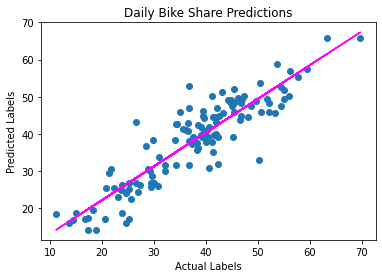

In [12]:
# Train the model
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

#from sklearn.linear_model import LinearRegression
#from sklearn.linear_model import Lasso
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.tree import export_text
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


# Define preprocessing for numeric columns (scale them)
numeric_features = [0,1,2,3,4]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', GradientBoostingRegressor())])
#pipeline = Pipeline(steps=[('preprocessor', preprocessor),
#                           ('regressor', RandomForestRegressor())])


# Fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, (y_train))
#print (model)


# Get predictions
predictions = model.predict(X_test)

# Display metrics
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

## Use the Trained Model

Save the trained model, and then use it to predict the price-per-unit for the following real estate transactions:

| transaction_date | house_age | transit_distance | local_convenience_stores | latitude | longitude |
| ---------------- | --------- | ---------------- | ------------------------ | -------- | --------- |
|2013.167|16.2|289.3248|5|24.98203|121.54348|
|2013.000|13.6|4082.015|0|24.94155|121.50381|

In [13]:
import joblib

# Save the model as a pickle file
filename = './real_estate_model.pkl'
joblib.dump(model, filename)

['./real_estate_model.pkl']

In [14]:
# Load the model from the file
loaded_model = joblib.load(filename)

# An array of features for each transaction
# order is ('transit_distance','local_convenience_stores','latitude','longitude','house_age')
X_new = np.array([[289.3248,5,24.98203,121.54348,16.2],
                  [4082.015,0,24.94155,121.50381,13.6]])

# Use the model to predict price_per_unit
results = loaded_model.predict(X_new)
print('Predictions for price-per-unit:')
for prediction in results:
    print(round(prediction, 1))

Predictions for price-per-unit:
49.3
16.7
